In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib

In [2]:
cols = [
    'Iteching', 'BlephritisA', 'ConjuctivitisA', 'CataractA', 'TrumaA', 'PtosisA',
    'PthysisA', 'Myopia', 'hyperopia', 'Stigmatisim', 'ALTsquint', 'nystugmus',
    'Amloypia', 'Age', 'Gender', 'CConjuctivitis', 'Nightblind', 'Emixed',
    'CBlephritis', 'VitaminAA'
]
df = pd.read_csv('vitaminA.csv')[cols]

df.head()

,Iteching,BlephritisA,ConjuctivitisA,CataractA,TrumaA,PtosisA,PthysisA,Myopia,hyperopia,Stigmatisim,ALTsquint,nystugmus,Amloypia,Age,Gender,CConjuctivitis,Nightblind,Emixed,CBlephritis,VitaminAA
0,0,0,0,0,0,1,0,0,0,0,0,0,0,11,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,11,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0


In [3]:
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values per column:\n", df.isnull().sum())

Shape: (18423, 20)

First 5 rows:
    Iteching  BlephritisA  ConjuctivitisA  CataractA  TrumaA  PtosisA  \
0         0            0               0          0       0        1   
1         0            0               0          0       0        0   
2         1            0               0          0       0        0   
3         0            0               0          0       0        0   
4         0            0               0          0       0        0   

   PthysisA  Myopia  hyperopia  Stigmatisim  ALTsquint  nystugmus  Amloypia  \
0         0       0          0            0          0          0         0   
1         0       0          0            0          0          0         0   
2         0       1          0            0          0          0         0   
3         0       0          0            0          0          0         0   
4         0       0          0            0          0          0         0   

   Age  Gender  CConjuctivitis  Nightblind  Emixed  CBlep

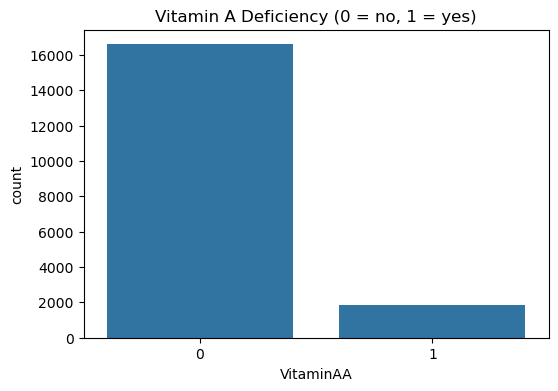


Proportions:
 VitaminAA
0    0.900505
1    0.099495
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='VitaminAA', data=df)
plt.title('Vitamin A Deficiency (0 = no, 1 = yes)')
plt.show()
print("\nProportions:\n", df['VitaminAA'].value_counts(normalize=True))

In [5]:
target_col = 'VitaminAA'
age_col = 'Age'
random_state = 42

In [6]:
bins = [5, 8, 11, 15]                     # edges: <=8, <=11, <=15
labels = ['6-8', '9-11', '12-15']
df['Age'] = pd.cut(df[age_col], bins=bins, labels=labels, right=True)
df.drop(columns=[age_col], inplace=True)

In [7]:
y = df[target_col]
X = df.drop(columns=[target_col])

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=random_state
)

# 5. Split remaining into val / test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=random_state
)

In [9]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=X.columns.tolist(), smoothing=0.3)
encoder.fit(X_train, y_train)
X_train_enc = encoder.transform(X_train)
X_val_enc   = encoder.transform(X_val)
X_test_enc  = encoder.transform(X_test)

print(f"Train: {X_train_enc.shape}, def%={y_train.mean():.3f}")
print(f"Val:   {X_val_enc.shape},   def%={y_val.mean():.3f}")
print(f"Test:  {X_test_enc.shape},  def%={y_test.mean():.3f}")

C:\Users\hanan\anaconda3\envs\dat405\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\hanan\anaconda3\envs\dat405\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\hanan\anaconda3\envs\dat405\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, 

Train: (12896, 18), def%=0.099
Val:   (2763, 18),   def%=0.100
Test:  (2764, 18),  def%=0.099


C:\Users\hanan\anaconda3\envs\dat405\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\hanan\anaconda3\envs\dat405\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\hanan\anaconda3\envs\dat405\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, 

In [11]:
X_train_enc.head()

,Iteching,BlephritisA,ConjuctivitisA,CataractA,TrumaA,PtosisA,PthysisA,Myopia,hyperopia,Stigmatisim,ALTsquint,nystugmus,Amloypia,Gender,CConjuctivitis,Nightblind,Emixed,CBlephritis
7237,0.021698,0.100702,0.106579,0.101418,0.100613,0.100354,0.099565,0.10235,0.101311,0.102126,0.099527,0.099496,0.100274,0.089068,0.058357,0.119658,0.100289,0.099654
5403,0.174111,0.100702,0.106579,0.101418,0.100613,0.100354,0.099565,0.10235,0.101311,0.102126,0.099527,0.099496,0.100274,0.108766,0.106010,0.119658,0.100289,0.099654
7536,0.021698,0.100702,0.106579,0.101418,0.100613,0.100354,0.099565,0.10235,0.101311,0.102126,0.099527,0.099496,0.100274,0.108766,0.058357,0.119658,0.100289,0.099654
9758,0.021698,0.100702,0.106579,0.101418,0.100613,0.100354,0.099565,0.10235,0.101311,0.102126,0.099527,0.099496,0.100274,0.089068,0.106010,0.119658,0.100289,0.099654
9645,0.174111,0.100702,0.106579,0.101418,0.100613,0.100354,0.099565,0.10235,0.101311,0.102126,0.099527,0.099496,0.100274,0.108766,0.106010,0.119658,0.100289,0.099654


In [12]:
joblib.dump((X_train_enc, y_train), 'train_data_VitA.pkl')
joblib.dump((X_val_enc,   y_val),   'val_data_VitA.pkl')
joblib.dump((X_test_enc,  y_test),  'test_data_VitA.pkl')

print("\nPreprocessed data saved to disk.")


Preprocessed data saved to disk.


In [13]:
import pandas as pd

# 1. Load the raw Vitamin A data (or load your preprocessed splits)
df = pd.read_csv('vitaminA.csv', usecols=['VitaminAA'])

# 2. Count each class
counts = df['VitaminAA'].value_counts()
not_deficient = counts.get(0, 0)
deficient     = counts.get(1, 0)

# 3. Compute proportions and ratio
total = not_deficient + deficient
prop_not = not_deficient / total
prop_def = deficient     / total
imbalance_ratio = not_deficient / deficient if deficient else float('inf')

print(f"Not deficient: {not_deficient} ({prop_not:.2%})")
print(f"Deficient:     {deficient} ({prop_def:.2%})")
print(f"Imbalance ratio (majority/minority): {imbalance_ratio:.2f}:1")


Not deficient: 16590 (90.05%)
Deficient:     1833 (9.95%)
Imbalance ratio (majority/minority): 9.05:1
